# Курсовой проект по машинному обучению
# Анализ клиентской оттока и разработка стратегии удержания клиентов
## Использование данных о клиентах X-банка для анализа оттока и разработки стратегии удержания.


#    Описание данных.

Признаки:
    

*    RowNumber — индекс строки в данных

*    CustomerId — уникальный идентификатор клиента

*    Surname — фамилия

*    CreditScore — кредитный рейтинг

*    Geography — страна проживания

*    Gender — пол

*    Age — возраст

*    Tenure — количество недвижимости у клиента

*    Balance — баланс на счёте

*    NumOfProducts — количество продуктов банка, используемых клиентом

*    HasCrCard — наличие кредитной карты

*    IsActiveMember — активность клиента

*    EstimatedSalary — предполагаемая зарплата

Целевой признак:

*   Exited — факт ухода клиента из банка

### Импортирование библиотек

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

# Импорт OneHotEncoder и OrdinalEncoder для работы с категориальными признаками
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder  

# Импорт функции train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split as tts  

# Импорт StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler  

# Импорт LogisticRegression (lr) для использования логистической регрессии
from sklearn.linear_model import LogisticRegression as lr  

# Импорт DecisionTreeClassifier (dtc) для использования классификатора дерева решений
from sklearn.tree import DecisionTreeClassifier as dtc  

# Импорт RandomForestClassifier (rfc) для использования классификатора случайного леса
from sklearn.ensemble import RandomForestClassifier as rfc  

# Импорт GridSearchCV (gscv) для выполнения поиска по сетке параметров
from sklearn.model_selection import GridSearchCV as gscv  

# Импорт classification_report для вывода отчета о классификации
from sklearn.metrics import classification_report  

# Импорт f1_score для вычисления F1-меры, метрики, объединяющей точность и полноту
from sklearn.metrics import f1_score  

# Импорт roc_auc_score для вычисления площади под ROC-кривой (AUC-ROC)
from sklearn.metrics import roc_auc_score


### Предварительная обработка данных

In [12]:
import sklearn

print('Версия scikit-learn -', sklearn.__version__)



Версия scikit-learn - 1.3.2


In [13]:
# загрузим данные из пакета dataset
df = pd.read_csv('dataset/Churn_Modelling.csv') 

 # выведем на экран первые строки нашего datasetа
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# посмотрим основные статистические характеристики числовых данных с помощью метода discribe()
df.describe() 


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
# Приведём столбцы к нижнему регистру
df.columns = df.columns.str.lower()
# можно посмотреть общую информацию с помощью метода info()
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


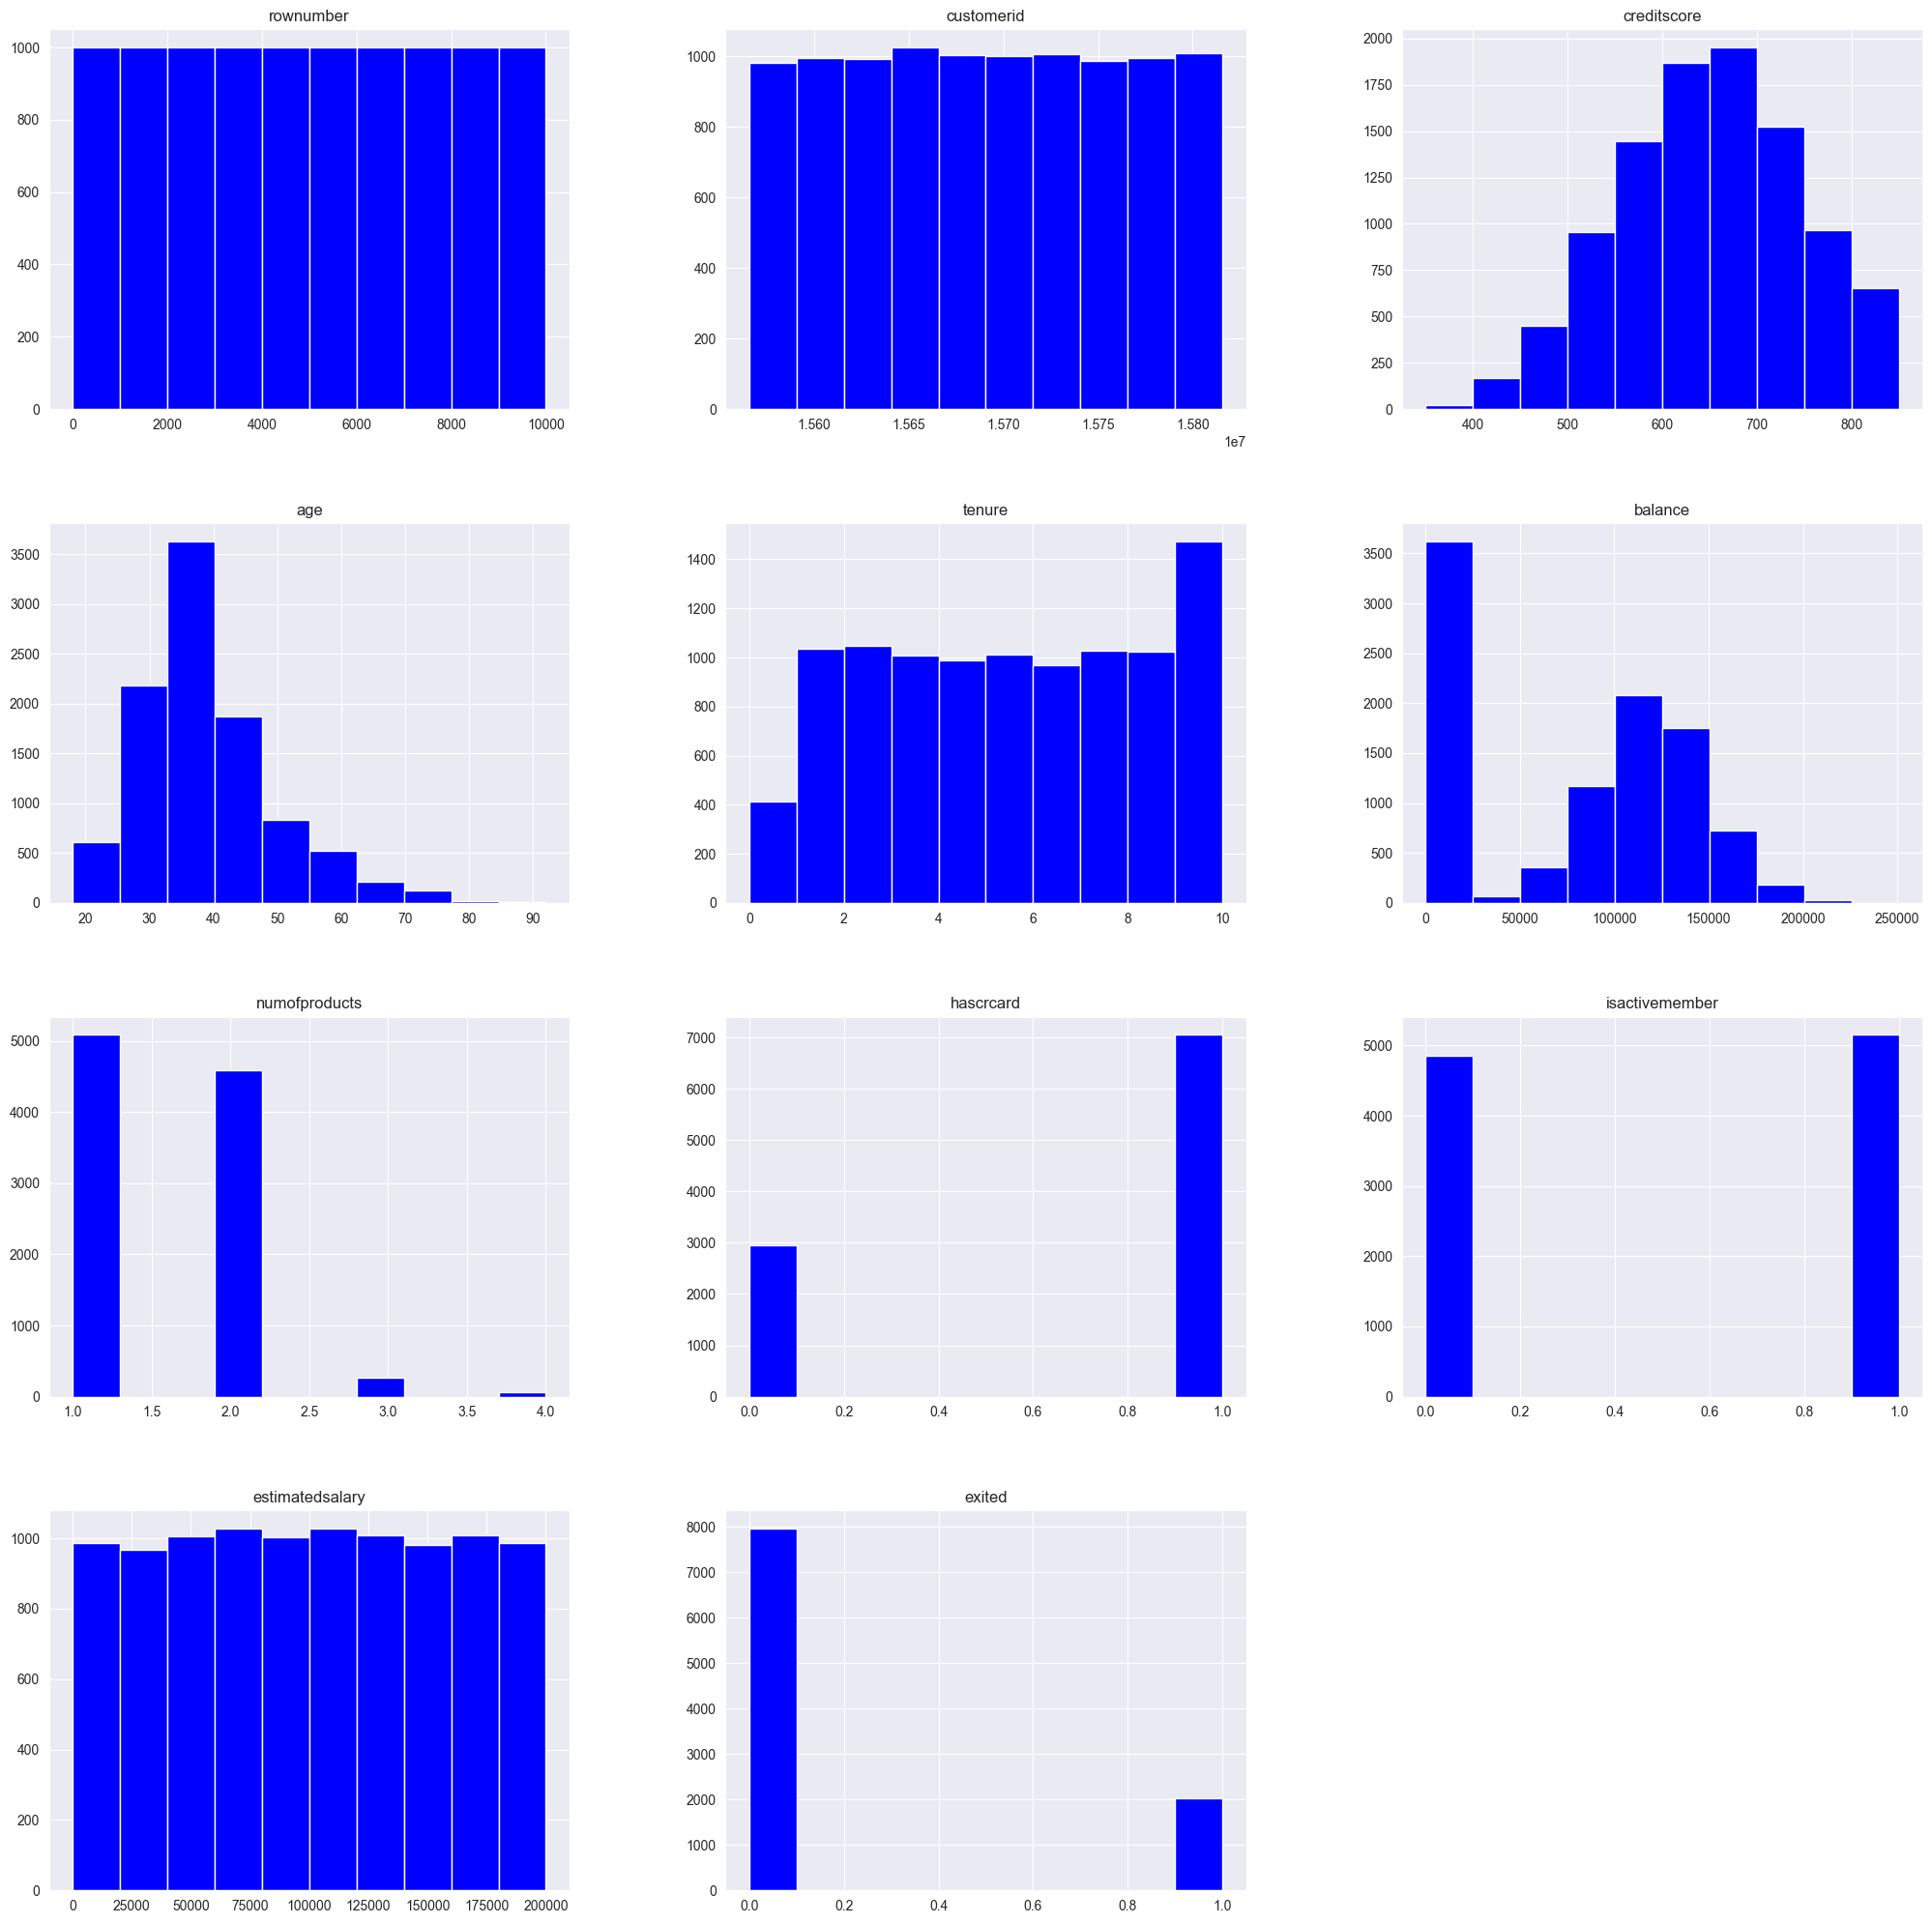

In [18]:
# Построим общую гисnограмму для всех столбцов таблицы
df.hist(figsize=(25,25),color='blue') 
plt.show()